# Exploratory Data Analysis

- Correlation analysis of numeric headphone features
- Best headphone brands based on customer product ratings
- Recurring terms that appear in the best reviewed headphone descriptions. These terms embody the qualities that make these headphones the best on the market.


In [1]:
#import libraries
import random
import pandas as pd
import numpy as np
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from scipy.stats import spearmanr
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

#custom display options
mpl.rcParams['figure.dpi'] = 250
pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv("Data/Filtered_Headphones.csv", sep=",", header=0, index_col=0)
print("rows: {}, columns: {}".format(df.shape[0],df.shape[1]))
df.head(3)

rows: 7742, columns: 65


,sku,name,type,startDate,new,active,lowPriceGuarantee,activeUpdateDate,regularPrice,salePrice,clearance,onSale,priceUpdateDate,preowned,upc,productTemplate,categoryPath,alternateCategories,customerReviewCount,customerReviewAverage,customerTopRated,freeShipping,freeShippingEligible,inStoreAvailability,inStoreAvailabilityUpdateDate,itemUpdateDate,onlineAvailability,onlineAvailabilityUpdateDate,releaseDate,shippingCost,specialOrder,shortDescription,class,classId,subclass,subclassId,department,departmentId,protectionPlanTerm,productVariations,manufacturer,modelNumber,albumTitle,condition,inStorePickup,friendsAndFamilyPickup,homeDelivery,quantityLimit,color,dollarSavings,percentSavings,orderable,shippingWeight,warrantyLabor,warrantyParts,longDescription,details,includedItemList,features,commerceSku,proposition65WarningType,depth(inches),width(inches),height(inches),weight(ounces)
0,6454189,Shure - KSE1500 Electrostatic Earphones System...,HardGood,2021-03-08,False,False,True,2021-11-16T00:01:40,2999.98,2999.98,False,False,2021-03-08T00:00:29,False,42406397742,Headphones_and_Headsets,"[{'id': 'cat00000', 'name': 'Best Buy'}, {'id'...",NaN,1.0,5.0,False,True,False,False,2021-11-08T11:47:14,2021-12-28T19:57:17,False,2021-11-08T11:47:14,NaN,0.0,False,NaN,MHT HEADPHONE,601,SO MHT HEADPHONE,5936,MAGNOLIA HOME THEATR,14,SHU,NaN,shure,SHU KSE1500SYSUS,KSE1500 Electrostatic Earphones System,New,False,True,False,5.0,Black,0.0,0.0,NotOrderable,3.7500,Every Shure® product comes with a Limited Warr...,Every Shure® product comes with a Limited Warr...,KSE1500 is capable of processing digital audio...,"[{'name': 'Headphone Fit', 'value': 'In-Ear', ...",NaN,[{'feature': 'Selectable digital or analogue i...,6454189,4,NaN,NaN,NaN,NaN
1,6227404,Pioneer - SE MASTER1 Wired Over-the-Ear Headph...,HardGood,2018-04-11,False,False,True,2020-02-28T19:24:10,2499.98,2499.98,False,False,2020-02-28T19:24:10,False,884938279901,Headphones_and_Headsets,"[{'id': 'cat00000', 'name': 'Best Buy'}, {'id'...",NaN,2.0,3.0,False,NaN,False,False,2020-06-26T03:56:37,2022-01-11T16:04:32,False,2020-06-26T03:56:37,NaN,NaN,False,Stereo output mode,MHT HEADPHONE,601,SO MHT HEADPHONE,5936,MAGNOLIA HOME THEATR,14,PIO,NaN,pioneer,SEMASTER1,SE MASTER1 Wired Over-the-Ear Headphones,New,False,False,False,5.0,Silver/Black,0.0,0.0,NotOrderable,6.5000,1 Year,1 Year,Equip your hi-fi room with these Pioneer over-...,"[{'name': 'Sound Isolating', 'value': 'No', 'v...","[{'includedItem': 'Pioneer SE-MASTER1'}, {'inc...",[{'feature': 'High-resolution playback\nThe SE...,6227404,1,NaN,NaN,NaN,16.16
2,6442577,Sennheiser - HD 820 Over-the-Ear Audiophile He...,HardGood,2020-12-01,False,True,True,2022-02-14T17:00:51,1999.98,1999.98,False,False,2022-06-20T00:01:49,False,615104300439,Headphones_and_Headsets,"[{'id': 'cat00000', 'name': 'Best Buy'}, {'id'...",NaN,1.0,5.0,False,True,True,True,2022-02-14T17:00:51,2022-07-28T01:41:53,True,2022-02-14T17:00:51,2020-11-19,0.0,False,NaN,MHT HEADPHONE,601,SO MHT HEADPHONE,5936,MAGNOLIA HOME THEATR,14,HD,NaN,sennheiser,HD 820,HD 820 Over-the-Ear Audiophile Headphones - Ri...,New,True,True,False,5.0,Black,0.0,0.0,Available,7.7779,2 years,2 years,For audiophiles there wasn&#8217;t any doubt: ...,"[{'name': 'Sound Isolating', 'value': 'Yes', '...","[{'includedItem': 'Headphones HD 820, closed-b...",[{'feature': 'Reference-grade Sound\nThe HD 82...,6442577,4,4.75,8.0,7.5,12.64


### Obtain summary statistics for numeric columns of interest 

In [3]:
float_cols = ["regularPrice","salePrice","customerReviewCount","customerReviewAverage","shippingCost",
             "dollarSavings","percentSavings","shippingWeight","depth(inches)",
             "width(inches)","height(inches)","weight(ounces)"]
df[float_cols].describe()

,regularPrice,salePrice,customerReviewCount,customerReviewAverage,shippingCost,dollarSavings,percentSavings,shippingWeight,depth(inches),width(inches),height(inches),weight(ounces)
count,7742.000000,7742.000000,4948.000000,4948.000000,1428.000000,7742.000000,7742.000000,7742.000000,2980.000000,3158.000000,3189.000000,4234.000000
mean,101.644436,95.871197,949.761924,4.105740,1.616127,5.773238,6.591100,0.747777,3.481611,4.529908,5.895657,10.784390
std,137.395785,135.085505,3100.553493,0.732858,2.520144,23.001247,18.193187,1.325473,3.505401,3.018064,6.287131,31.471898
min,1.500000,0.990000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.080000,0.040000,0.020000,0.000000
25%,29.950000,24.990000,3.000000,3.900000,0.000000,0.000000,0.000000,0.120000,1.180000,1.750000,1.750000,1.600000
50%,59.990000,49.990000,25.000000,4.300000,0.000000,0.000000,0.000000,0.450000,2.600000,4.880000,6.250000,5.600000
75%,129.990000,120.990000,373.000000,4.500000,5.490000,0.000000,0.000000,1.000000,4.750000,6.900000,7.750000,10.240000
max,2999.980000,2999.980000,59742.000000,5.000000,6.990000,449.990000,96.700000,54.000000,54.000000,30.200000,54.000000,1008.000000


In [4]:
print("Example of the most expensive headphone: {}\nWorth $2999.98"
      .format(list(df.loc[df['salePrice'] == 2999.98,"name"])[0]))
print("\nExample of the least expensive headphones: {}\nWorth: $0.99"
      .format(list(df.loc[df['salePrice'] == 0.99,"name"])[0]))

print("\nExample of the most reviewed headphones: {}\nReview count: 59742"
      .format(list(df.loc[df['customerReviewCount'] == 59742,"name"])[0]))
print("\nExample of the least reviewed headphones: {}\nReview count: 1"
      .format(list(df.loc[df['customerReviewCount'] == 1,"name"])[3]))

print("\nExample of the best reviewed headphones: {}\nAverage rating: 5"
      .format(list(df.loc[df['customerReviewAverage'] == 5,"name"])[1]))
print("\nExample of the worst reviewed headphones: {}\nAverage rating: 1"
      .format(list(df.loc[df['customerReviewAverage'] == 1,"name"])[0]))


Example of the most expensive headphone: Shure - KSE1500 Electrostatic Earphones System - Black
Worth $2999.98

Example of the least expensive headphones: Rocketfish™ - Earbud Headphones - Pink
Worth: $0.99

Example of the most reviewed headphones: Apple - AirPods with Charging Case (2nd generation) - White
Review count: 59742

Example of the least reviewed headphones: Audeze - LCD-XC Over-the-Ear Studio Headphones - Black
Review count: 1

Example of the best reviewed headphones: Sennheiser - HD 820 Over-the-Ear Audiophile Headphones - Ring Radiator Drivers with Glass Reflector Technology, with Balanced Cable - Black
Average rating: 5

Example of the worst reviewed headphones: Master & Dynamic - MW50+ Wireless On-Ear Headphones - Black Metal/Gold Leather
Average rating: 1


### Lets evaluate the spearman correlation between the numeric data, such as salePrice and customerReviewAverage. All the below variables are continous except for the customerReviewAverage, which contains ordinal categorical data. 

In [5]:
df_corr = df[float_cols]
df_corr = df_corr.corr(method = "spearman")
df_corr

,regularPrice,salePrice,customerReviewCount,customerReviewAverage,shippingCost,dollarSavings,percentSavings,shippingWeight,depth(inches),width(inches),height(inches),weight(ounces)
regularPrice,1.000000,0.971973,0.124733,0.206619,-0.766317,0.021211,-0.017275,0.656769,0.141537,0.280786,0.262035,0.375565
salePrice,0.971973,1.000000,0.055894,0.209011,-0.776955,-0.173186,-0.213444,0.633709,0.155318,0.283045,0.255523,0.373666
customerReviewCount,0.124733,0.055894,1.000000,0.094716,-0.087153,0.329913,0.329810,0.020215,-0.108267,-0.163781,-0.057186,-0.068510
customerReviewAverage,0.206619,0.209011,0.094716,1.000000,0.008615,-0.017116,-0.030694,0.248166,0.101582,0.131198,0.233515,0.173127
shippingCost,-0.766317,-0.776955,-0.087153,0.008615,1.000000,0.071923,0.140019,-0.437623,-0.044187,-0.083408,-0.006147,-0.188765
dollarSavings,0.021211,-0.173186,0.329913,-0.017116,0.071923,1.000000,0.993963,0.037423,-0.100032,-0.066666,-0.005106,-0.023278
percentSavings,-0.017275,-0.213444,0.329810,-0.030694,0.140019,0.993963,1.000000,0.014360,-0.104360,-0.081084,-0.012853,-0.037373
shippingWeight,0.656769,0.633709,0.020215,0.248166,-0.437623,0.037423,0.014360,1.000000,0.355504,0.549211,0.476689,0.577647
depth(inches),0.141537,0.155318,-0.108267,0.101582,-0.044187,-0.100032,-0.104360,0.355504,1.000000,0.456208,0.253894,0.394088
width(inches),0.280786,0.283045,-0.163781,0.131198,-0.083408,-0.066666,-0.081084,0.549211,0.456208,1.000000,0.579075,0.524224


#### To visualize this data as a heatmap we first create  a mask to remove half the data along the diagonal. This is done to prevent repitition,  since all the correlation information is repeated across this 12 by 12 matrix. 

In [6]:
heatmap_shape = np.triu(np.ones(shape = df_corr.shape, like = df_corr.to_numpy()))
np.fill_diagonal(heatmap_shape, 0)
heatmap_shape

array([[0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

#### Create the heatmap

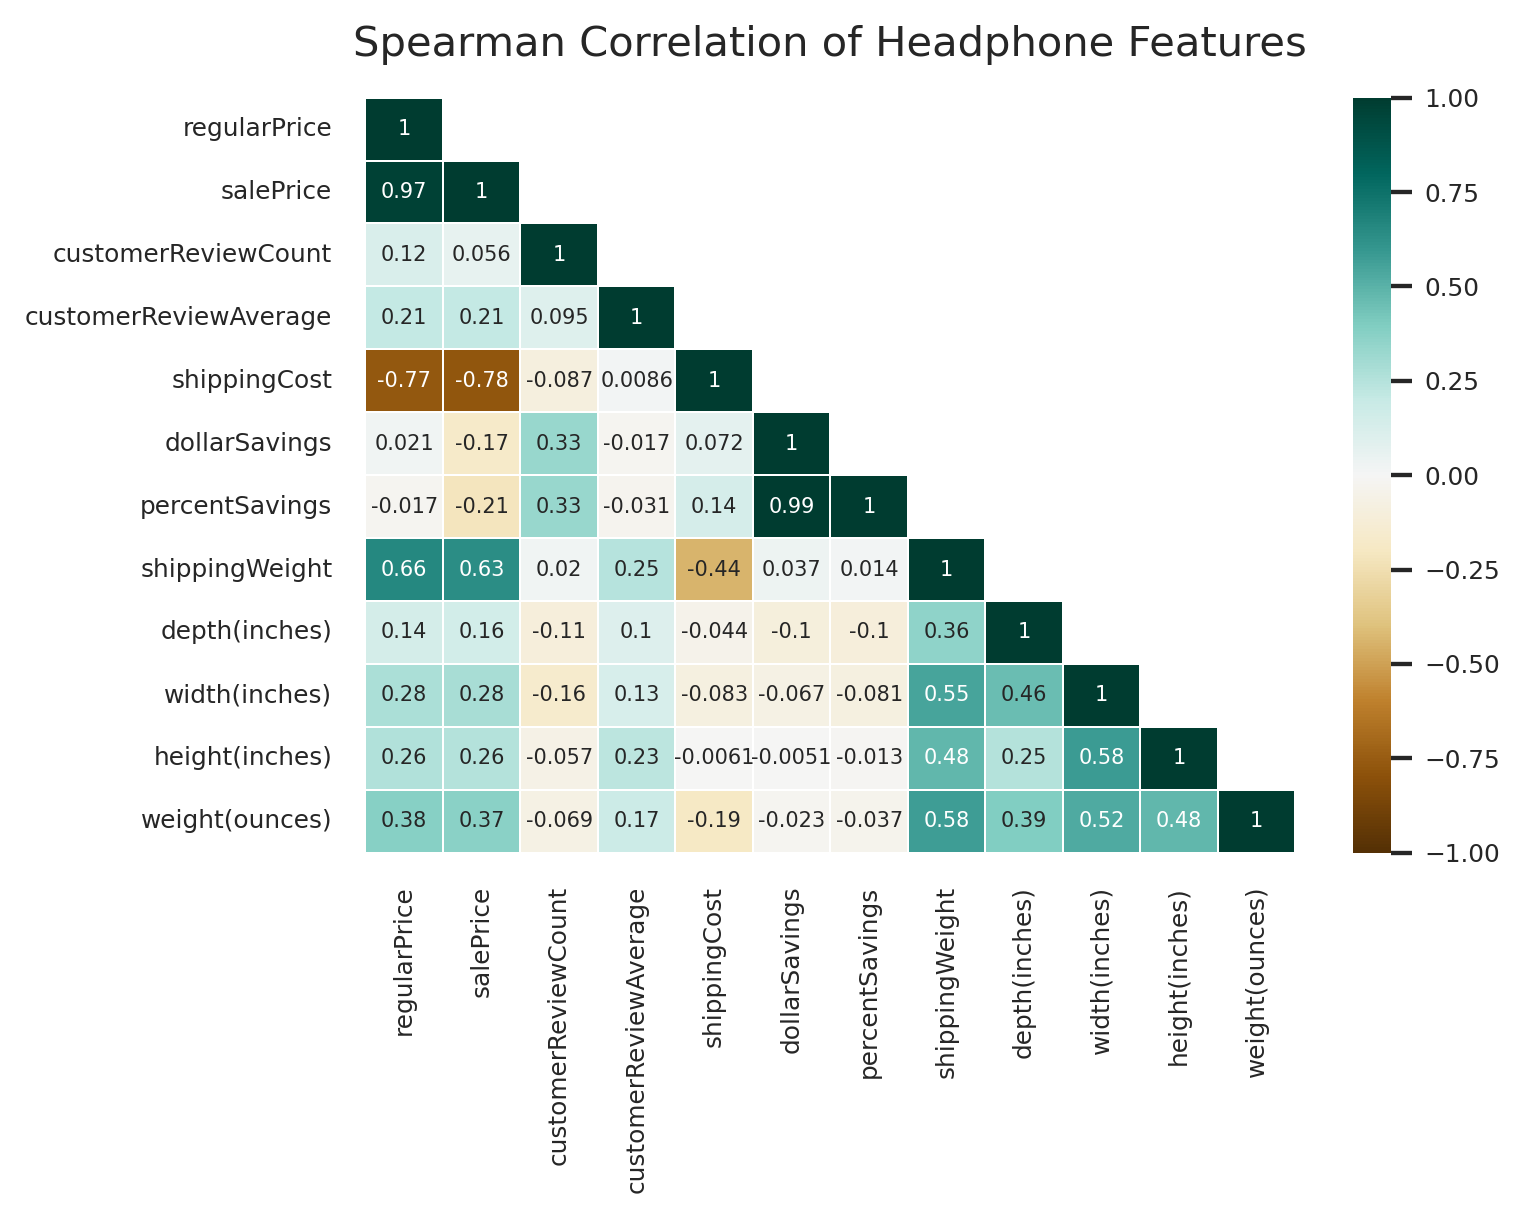

In [7]:
sns.set(font_scale=0.65, style = 'white')
corr_heatmap = sns.heatmap(df_corr,cmap = "BrBG",vmin = -1, vmax = 1, annot = True,mask = heatmap_shape,
                           linewidth = 0.5, annot_kws = {"size" : 6})
corr_heatmap.set_title('Spearman Correlation of Headphone Features', fontdict={'fontsize':12}, pad=12)
plt.savefig('Data/Correlation_Heatmap.png',dpi = 600,bbox_inches='tight')

### A few patterns emerge. 
- We expect large items to be heavy, which we see as a cluster of positive correlation around the shippingweight, depth, width, height and weight features
- These large items also tend to be more expensive, with a positive correlation between weight, size and price
- Shipping is usually free for expensive items which is why we see a strong negative correlation
- There is a weak positive correlation between price and average customer reviews 

### Which brand is the best reviewed? To answer this, I filtered for manufacturers that have at least 5 distinct headphone models and a median number of reviews of 5 across their products. As a result, 89 brands are identified and ranked based on their median headphone customerReviewAverage.

In [8]:
brand_review = df[["manufacturer","modelNumber","customerReviewAverage","customerReviewCount"]]\
            .groupby(['manufacturer']).agg({'modelNumber' : 'nunique','customerReviewAverage' : 'median',
            'customerReviewCount': 'median'}).rename(columns = {'modelNumber' : 'count_uniqueProducts',
            'customerReviewAverage' : 'median_review', 'customerReviewCount' : 'median_reviewCount'})\
                .reset_index()

brand_review = brand_review.sort_values(by=['median_review'], ascending = False)
brand_review = brand_review[(brand_review['count_uniqueProducts'] >= 5) & (brand_review['median_reviewCount'] >= 5)]
df_BrandReview = df[df['manufacturer'].isin(brand_review.iloc[0:11,0])]

display(brand_review)

,manufacturer,count_uniqueProducts,median_review,median_reviewCount
36,audiofly,8,4.8,5.0
364,shokz,15,4.6,235.0
50,belkin,11,4.6,56.0
28,apple,20,4.6,2505.0
63,bose,105,4.6,941.5
...,...,...,...,...
59,blueant,22,3.2,9.0
205,jarv,7,3.1,11.0
121,ecko,14,2.6,51.0
120,earpollution,5,2.5,38.0


#### Visualize the top 11 best ranked headphone manufacturers.

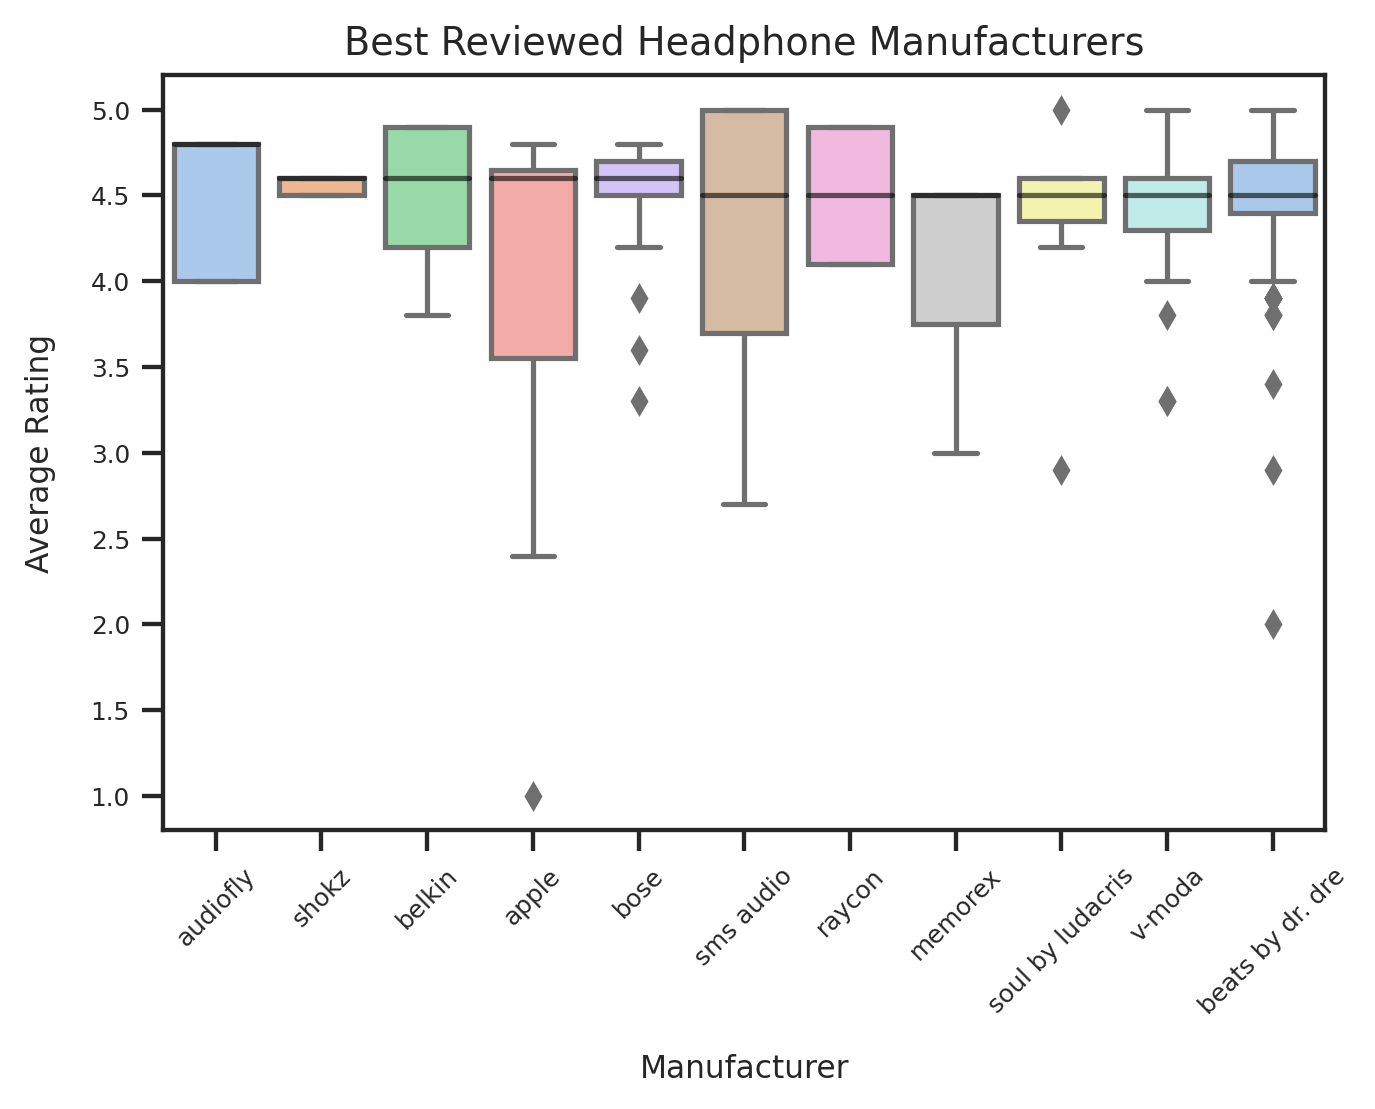

In [9]:
sns.set_style('white', rc={'xtick.bottom': True,'ytick.left': True})
sns.boxplot(data = df_BrandReview, x = df_BrandReview.manufacturer,
                        y = df_BrandReview.customerReviewAverage,order = brand_review.iloc[0:11,0],
                        palette = "pastel",medianprops=dict(color="#000000", alpha=0.6))

plt.xticks(rotation=45)
plt.xlabel('Manufacturer', fontsize = 9,labelpad = 10)
plt.ylabel('Average Rating', fontsize = 9, labelpad = 10)
plt.title('Best Reviewed Headphone Manufacturers', fontsize = 11)
plt.savefig('Data/Best_Reviewed_Headphones_Boxplot.png',dpi = 600,bbox_inches='tight')

### The two outliers for Apple and Beats by Dr. Dre have a very low average rating! What are these products?

In [10]:
df_outliers = df[(df['manufacturer'].isin(["apple","beats by dr. dre"])) & (df['customerReviewAverage'] < 2.25)]
df_outliers[['name','regularPrice','salePrice','customerReviewAverage','customerReviewCount','shortDescription','longDescription']]

,name,regularPrice,salePrice,customerReviewAverage,customerReviewCount,shortDescription,longDescription
1602,Beats By Dr. Dre - Monster Diddybeats Earbud H...,149.99,149.99,2.0,5.0,From our expanded online assortment; ControlTa...,Rock out to your favorite tunes using these ea...
7263,Apple® - Lanyard Headphones for 1st-Generation...,54.99,9.99,1.0,1.0,Compatible with 1st-generation iPod nano; lany...,Just plug this lanyard into the dock connector...


### Lets examine the most common terms as a wordcloud from the best reviewed headphones.  Using the 'longDescription' column and filtering for a 'customerReviewAverage' above 4.3 with at least 50 reviews. 

In [11]:
df_reviewscloud = df[(df['customerReviewAverage'] > 4.3) & (df['customerReviewCount'] >= 50)]
text = " ".join(list(df_reviewscloud.longDescription))
print(text[0:2000])

AirPods Max reimagine over-ear headphones. An Apple-designed dynamic driver provides immersive high-fidelity audio. Every detail, from canopy to cushions, has been designed for an exceptional fit. Active Noise Cancellation blocks outside noise, while Transparency mode lets it in. And spatial audio with dynamic head tracking provides theater-like sound that surrounds you.&#185; AirPods Max reimagine over-ear headphones. An Apple-designed dynamic driver provides immersive high-fidelity audio. Every detail, from canopy to cushions, has been designed for an exceptional fit. Active Noise Cancellation blocks outside noise, while Transparency mode lets it in. And spatial audio with dynamic head tracking provides theater-like sound that surrounds you.&#185; AirPods Max reimagine over-ear headphones. An Apple-designed dynamic driver provides immersive high-fidelity audio. Every detail, from canopy to cushions, has been designed for an exceptional fit. Active Noise Cancellation blocks outside no

### The below scripts were modified from: https://github.com/amueller/word_cloud

In [12]:
mask = np.asarray(Image.open("Data/headphone_template.jpg"))

In [13]:
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

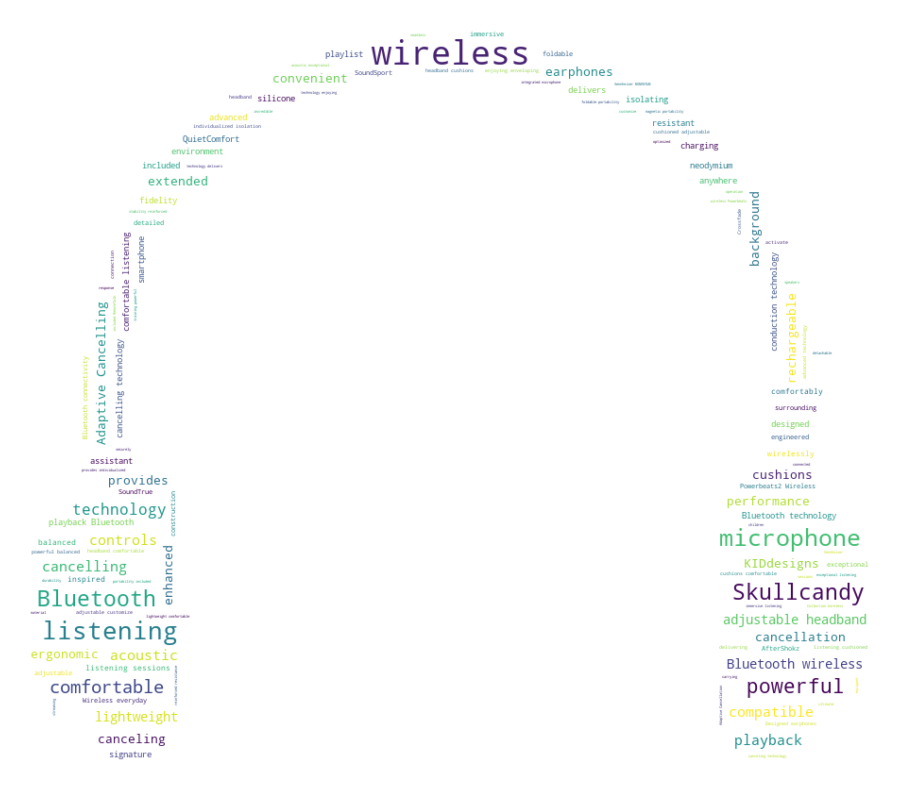

In [14]:
# adding specific stopwords that are non-informative
stopwords = set(STOPWORDS)
stopwords.add("headphone")
stopwords.add("headphones")
stopwords.add("features")
stopwords.add("Featuring")
stopwords.add("favorite")
stopwords.add("experience")

wc = WordCloud(background_color="white",max_words=1000, mask=mask,stopwords = stopwords, margin=10,
               random_state=1, min_word_length = 8).generate(text)

default_colors = wc.to_array()

plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")

plt.axis("off")
plt.imshow(default_colors, interpolation='bilinear')
plt.savefig('Data/Headphones_Wordcloud.pdf')